# Lab №2

## Выполнение

### 0. Load the manipulator model from the toolbox according to the selected robot kinematics option. Fill in all parameters of the robot model as specified in Laboratory Work No. 1.

In [45]:
from math import pi
import numpy as np
import roboticstoolbox as rtb
import matplotlib.pyplot as plt
import spatialmath.base as sb

### 1. Импортируем модель KR5

In [46]:
robot = rtb.models.DH.KR5()
print(robot)

DHRobot: KR5 (by KUKA), 6 joints (RRRRRR), dynamics, geometry, standard DH parameters
┌─────┬────────┬──────┬────────┬─────────┬────────┐
│ θⱼ  │   dⱼ   │  aⱼ  │   ⍺ⱼ   │   q⁻    │   q⁺   │
├─────┼────────┼──────┼────────┼─────────┼────────┤
│  q1 │    0.4 │ 0.18 │ -90.0° │ -155.0° │ 155.0° │
│  q2 │      0 │  0.6 │   0.0° │ -180.0° │  65.0° │
│  q3 │      0 │ 0.12 │  90.0° │  -15.0° │ 158.0° │
│  q4 │  -0.62 │    0 │ -90.0° │ -350.0° │ 350.0° │
│  q5 │      0 │    0 │  90.0° │ -130.0° │ 130.0° │
│  q6 │ -0.115 │    0 │ 180.0° │ -350.0° │ 350.0° │
└─────┴────────┴──────┴────────┴─────────┴────────┘

┌──┬──┐
└──┴──┘

┌──────┬──────┬──────┬──────┬──────┬──────┬──────┐
│ name │ q0   │ q1   │ q2   │ q3   │ q4   │ q5   │
├──────┼──────┼──────┼──────┼──────┼──────┼──────┤
│   qr │  45° │  60° │  45° │  30° │  45° │  30° │
│   qz │  0°  │  0°  │  0°  │  0°  │  0°  │  0°  │
│  qk1 │  45° │  60° │  45° │  30° │  45° │  30° │
│  qk2 │  45° │  60° │  30° │  60° │  45° │  30° │
│  qk3 │  30° │  60

2. Fill in all parameters of the robot model as specified in Laboratory Work No. 1.

In [47]:
print(robot.links[0].dyn())  # initial dynamic parameters of the first link

m     =         0 
r     =         0        0        0 
        |        0        0        0 | 
I     = |        0        0        0 | 
        |        0        0        0 | 
Jm    =         0 
B     =         0 
Tc    =         0(+)        0(-) 
G     =         0 
qlim  =      -2.7 to      2.7


In [48]:
robot.links[0].m = 20
robot.links[1].m = 17.4
robot.links[2].m = 4.8
robot.links[3].m = 0.82
robot.links[4].m = 0.34
robot.links[5].m = 0.09

robot.links[0].r = [0, 0, 0]
robot.links[1].r = [-0.3638, 0.006, 0.2275]
robot.links[2].r = [-0.0203, -0.0141, 0.07]
robot.links[3].r = [0, 0.019, 0]
robot.links[4].r = [0, 0, 0]
robot.links[5].r = [0, 0, 0.032]

robot.links[0].I = [0, 0.35, 0, 0, 0, 0]
robot.links[1].I = [0.13, 0.524, 0.539, 0, 0, 0]
robot.links[2].I = [0.066, 0.086, 0.0125, 0, 0, 0]
robot.links[3].I = [0.0018, 0.0013, 0.0018, 0, 0, 0]
robot.links[4].I = [0.0003, 0.0004, 0.0003, 0, 0, 0]
robot.links[5].I = [0.00015, 0.00015, 0.00004, 0, 0, 0]

robot.links[0].Jm = 0.0004
robot.links[1].Jm = 0.0004
robot.links[2].Jm = 0.0004
robot.links[3].Jm = 0.000033
robot.links[4].Jm = 0.000033
robot.links[5].Jm = 0.000033


robot.links[0].B = 0.0015
robot.links[1].B = 0.000817
robot.links[2].B = 0.00138
robot.links[3].B = 0.0000712
robot.links[4].B = 0.0000826
robot.links[5].B = 0.0000367


robot.links[0].Tc = [0.395, -0.435]
robot.links[1].Tc = [0.126, -0.071]
robot.links[2].Tc = [0.132, -0.105]
robot.links[3].Tc = [0.0112, -0.0169]
robot.links[4].Tc = [0.00926, -0.0145]
robot.links[5].Tc = [0.00396, -0.0105]

robot.links[0].G = -62.6111
robot.links[1].G = 107.8150000000000
robot.links[2].G = -53.7063
robot.links[3].G = 76.0364
robot.links[4].G = 71.923
robot.links[5].G = 76.686

robot.links[0].qlim = [-2.792526803190927, 2.792526803190927]
robot.links[1].qlim = [-0.785398163397448, 3.926990816987241]
robot.links[2].qlim = [-3.926990816987241, 0.785398163397448]
robot.links[3].qlim = [-1.919862177193763, 2.967059728390360]
robot.links[4].qlim = [-1.745329251994330, 1.745329251994330]
robot.links[5].qlim = [-4.642575810304916, 4.642575810304916]


4. Solve the forward kinematics problem for the given generalized coordinates.

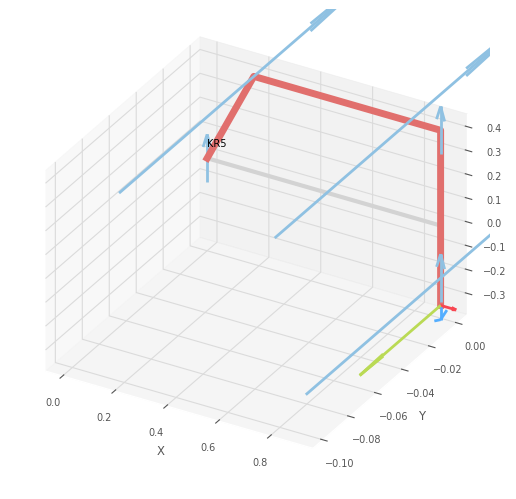

<Figure size 640x480 with 0 Axes>

In [49]:
q_start = [0, 0, 0, 0, 0, 0]
robot.plot(q_start)
plt.show()

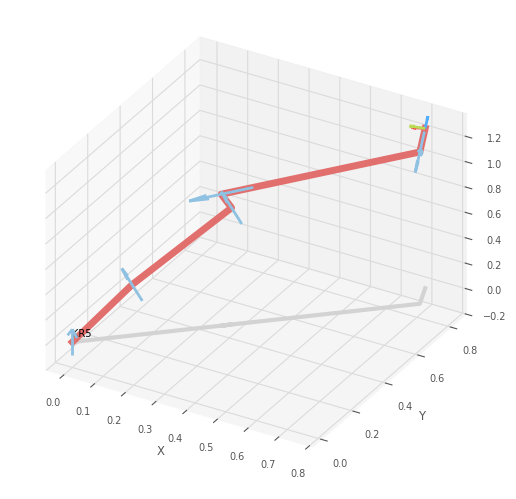

<Figure size 640x480 with 0 Axes>

In [50]:
q_start = [pi/4, -pi/3, -pi/4, pi/3, -pi/3, pi/4]
robot.plot(q_start)
plt.show()

In [51]:
T_start = robot.fkine(q_start)
print(T_start)

  -0.805    -0.5292   -0.2681    0.7101    
   0.128    -0.5962    0.7926    0.8321    
  -0.5792    0.6038    0.5477    1.259     
   0         0         0         1         



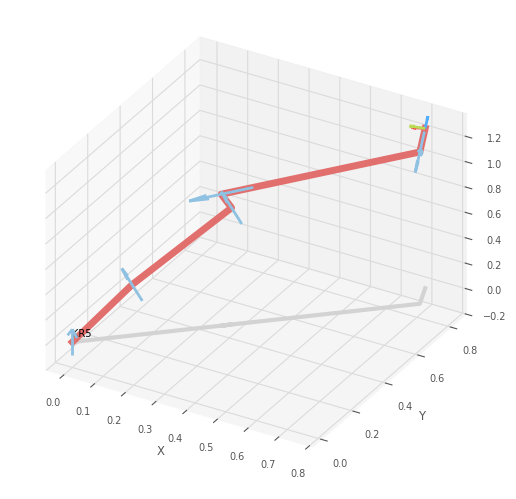

<Figure size 640x480 with 0 Axes>

In [52]:
q_start = [pi/4, -pi/3, -pi/4, pi/3, -pi/3, pi/4]
robot.plot(q_start)
plt.show()

5. Construct the manipulator's workspace under the given joint constraints.


In [53]:
T_start = robot.fkine(q_start)
print(T_start)

  -0.805    -0.5292   -0.2681    0.7101    
   0.128    -0.5962    0.7926    0.8321    
  -0.5792    0.6038    0.5477    1.259     
   0         0         0         1         



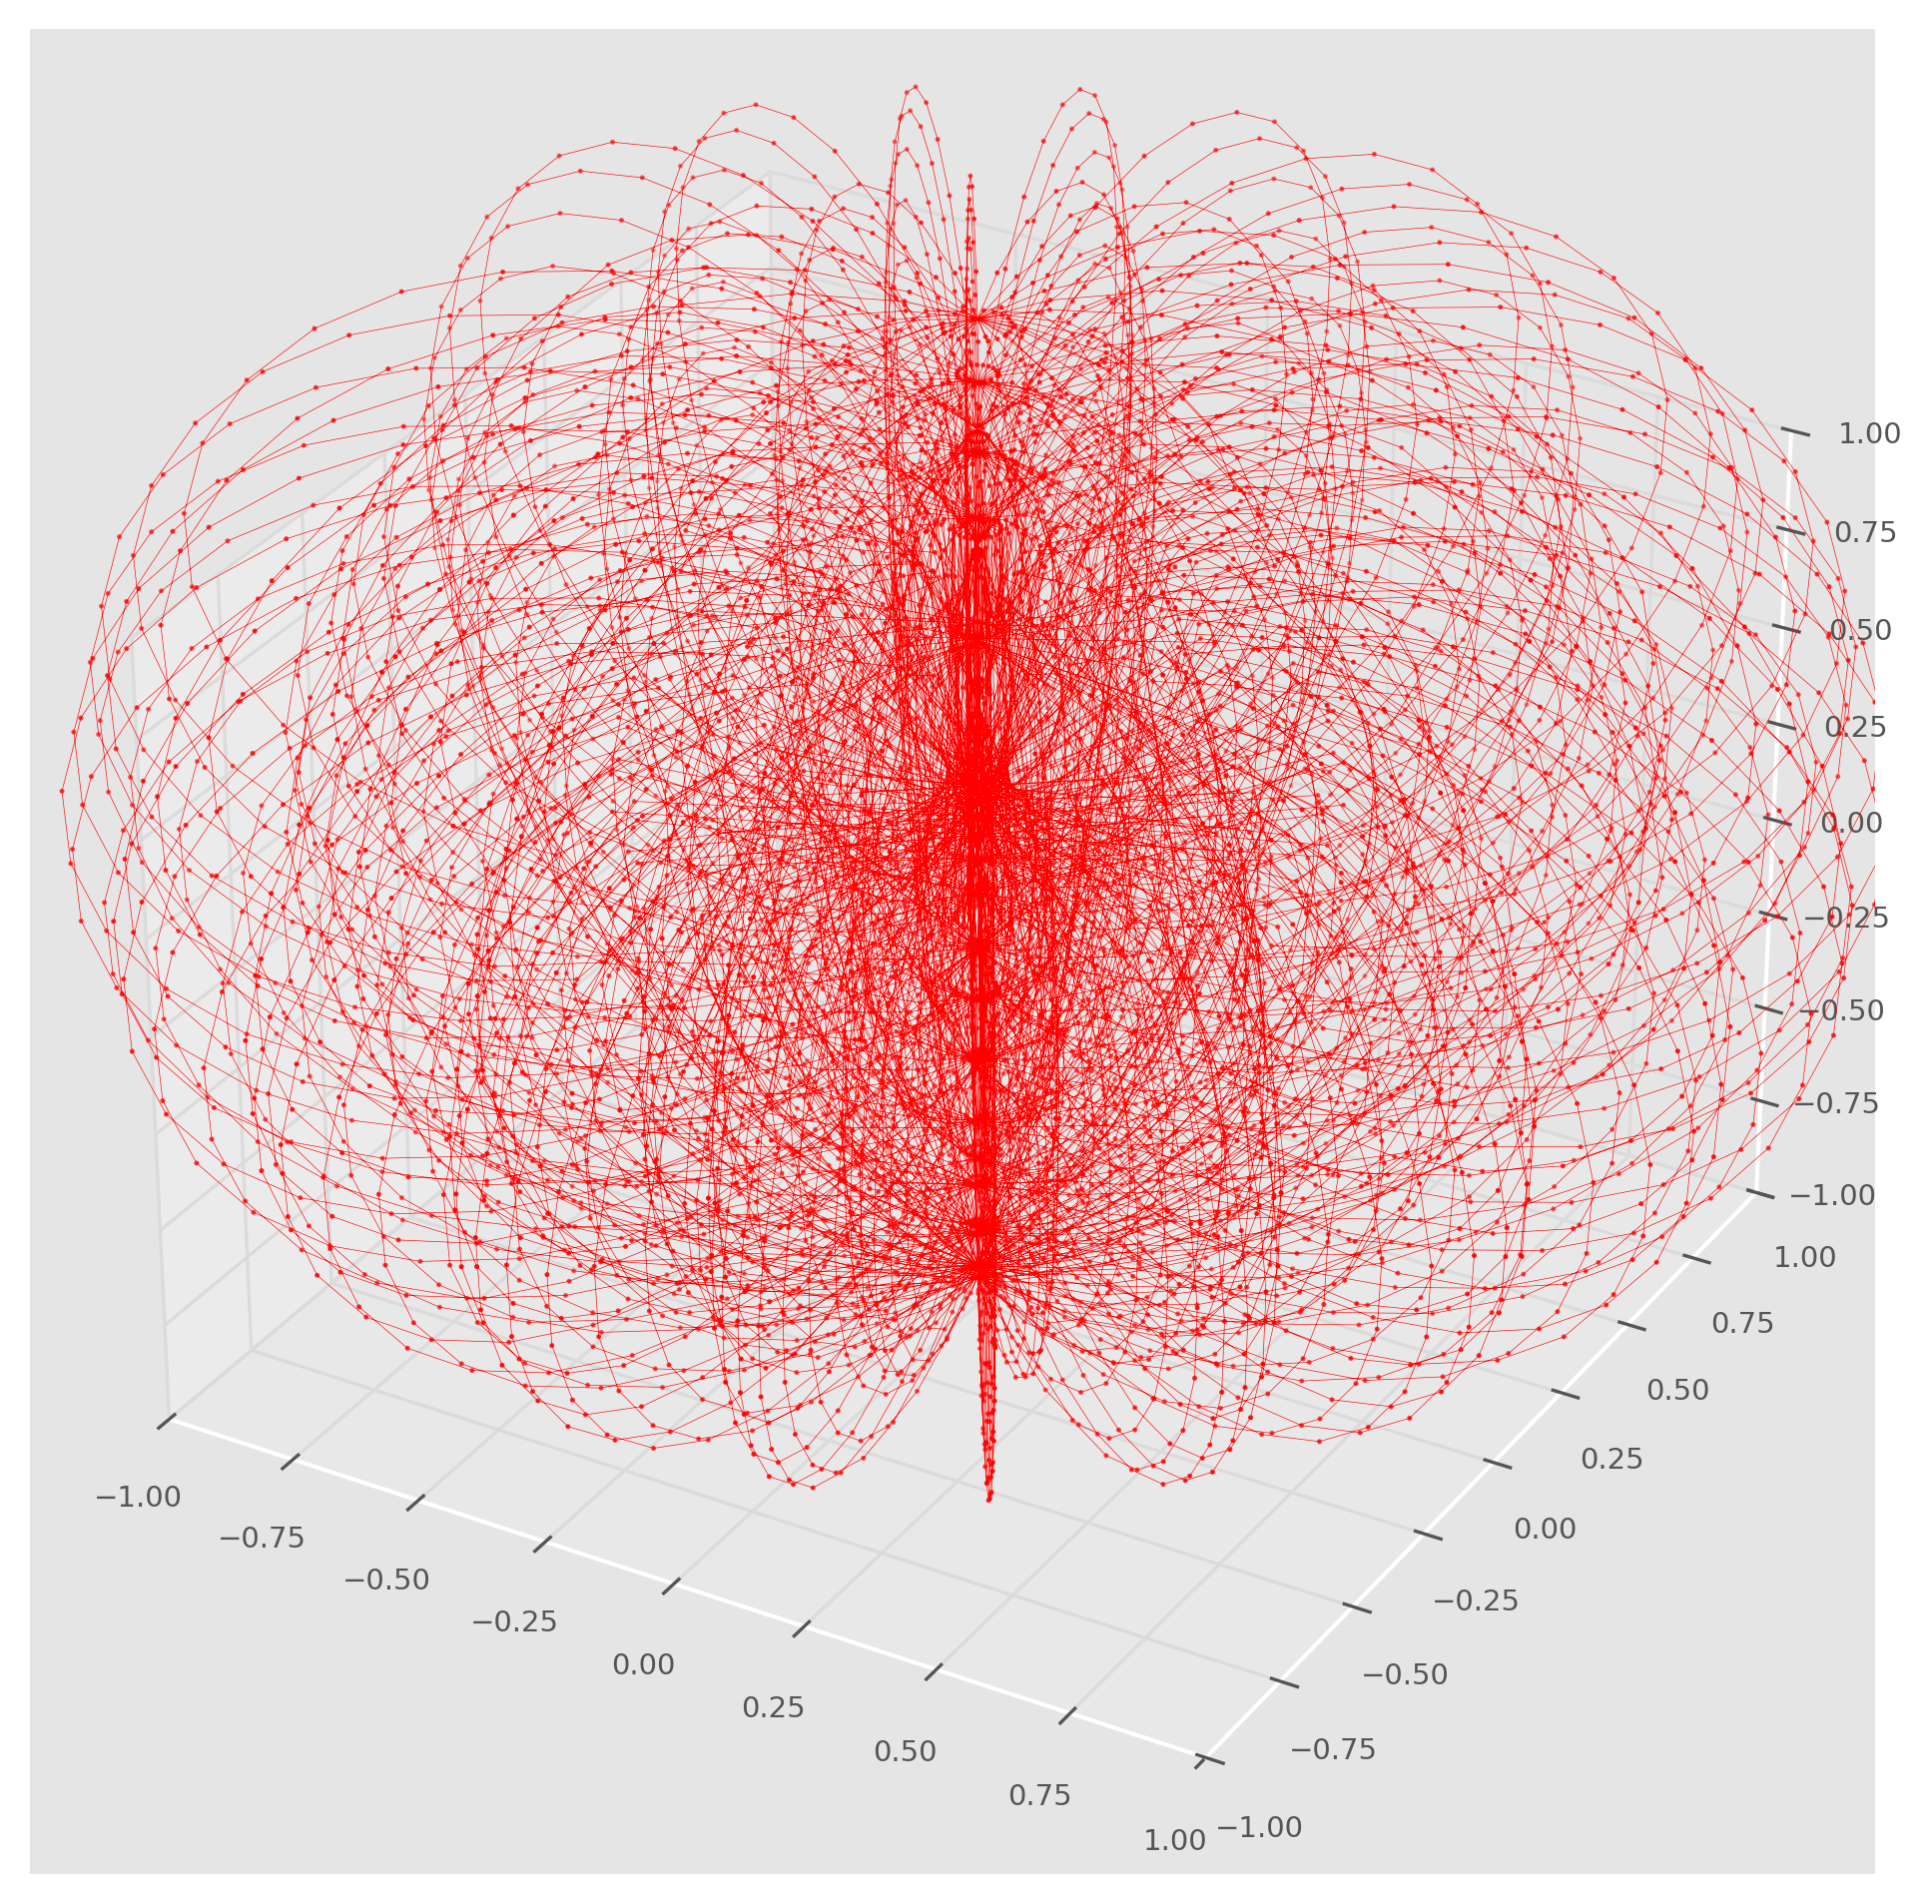

In [54]:
n = 20
move = [np.linspace(robot.links[i].qlim[0], robot.links[i].qlim[1], n) for i in range(3)]
pose = np.zeros([3, n**3])
i = 0

# Compute workspace
for q1 in move[0]:
    for q2 in move[1]:
        for q3 in move[2]:
            Tt = robot.fkine([q1, q2, q3, 0, 0, 0])
            pose[:, i] = Tt.t
            i += 1



plt.figure(figsize=(8,8), dpi=300)
ax = plt.axes(projection="3d")
ax.plot3D(pose[0], pose[1], pose[2], color='red', linewidth=0.15)
ax.scatter3D(pose[0], pose[1], pose[2], s=0.5, color='red')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
plt.show()

6. Select an end point within the workspace and solve the inverse kinematics problem for it.

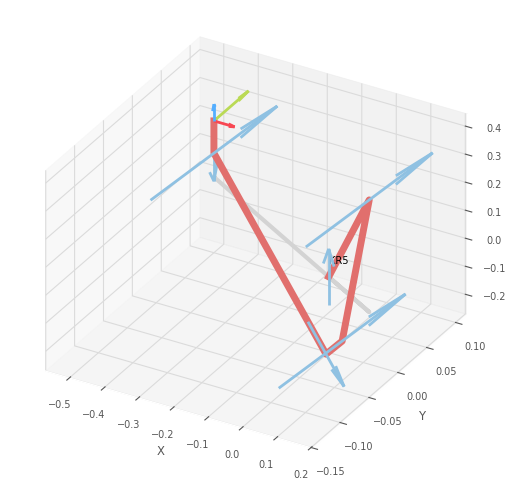

<Figure size 640x480 with 0 Axes>

In [55]:
point = [-0.5,0.1,0.2]
T_end = sb.transl(point)
q_end = robot.ikine_GN(T_end).q  # Есть другие методы, помимо ikine_GN
robot.plot(q_end)
plt.show()

7. Plan the trajectory between the initial and final positions of the manipulator's end-effector using at least three planning methods.

In [56]:
import numpy as np
import roboticstoolbox as rtb
from spatialmath import SE3

# Initialize Puma 560
robot = rtb.models.DH.KR5()

# Compute workspace to select a point
n = 20
move = [np.linspace(robot.links[i].qlim[0], robot.links[i].qlim[1], n) for i in range(3)]
pose = np.zeros([3, n**3])
i = 0
for q1 in move[0]:
    for q2 in move[1]:
        for q3 in move[2]:
            Tt = robot.fkine([q1, q2, q3, 0, 0, 0])
            pose[:, i] = Tt.t
            i += 1

# Select a point from the workspace
p = pose[:, 0]
T = SE3(p)

# Solve inverse kinematics
q0 = np.zeros(6)
sol = robot.ikine_LM(T, q0=q0)
q_solution = sol.q
print("Selected end point (m):", p)
print("Joint angles (rad):", q_solution)
print("Achieved position (m):", robot.fkine(q_solution).t)

Selected end point (m): [0.65810914 0.30688133 1.0788972 ]
Joint angles (rad): [ 4.36332313e-01  1.09562029e-01 -3.13964096e+00 -6.89208246e-09
 -1.11513719e-01 -2.70526033e+00]
Achieved position (m): [0.65810914 0.30688133 1.0788972 ]


In [57]:
N = 100
t_start = 0
t_stop = 5
t_shag = t_stop/N
time = np.arange(t_start, t_stop, t_shag)

tr_jtraj = rtb.jtraj(q_start, q_end, time)

In [58]:
tr_trap = rtb.mtraj(rtb.trapezoidal, q_start, q_end, time)

In [59]:
tr_quin = rtb.mtraj(rtb.quintic, q_start, q_end, time)

8. Plot graphs of position, velocity, and acceleration of the robot's joints during trajectory motion.

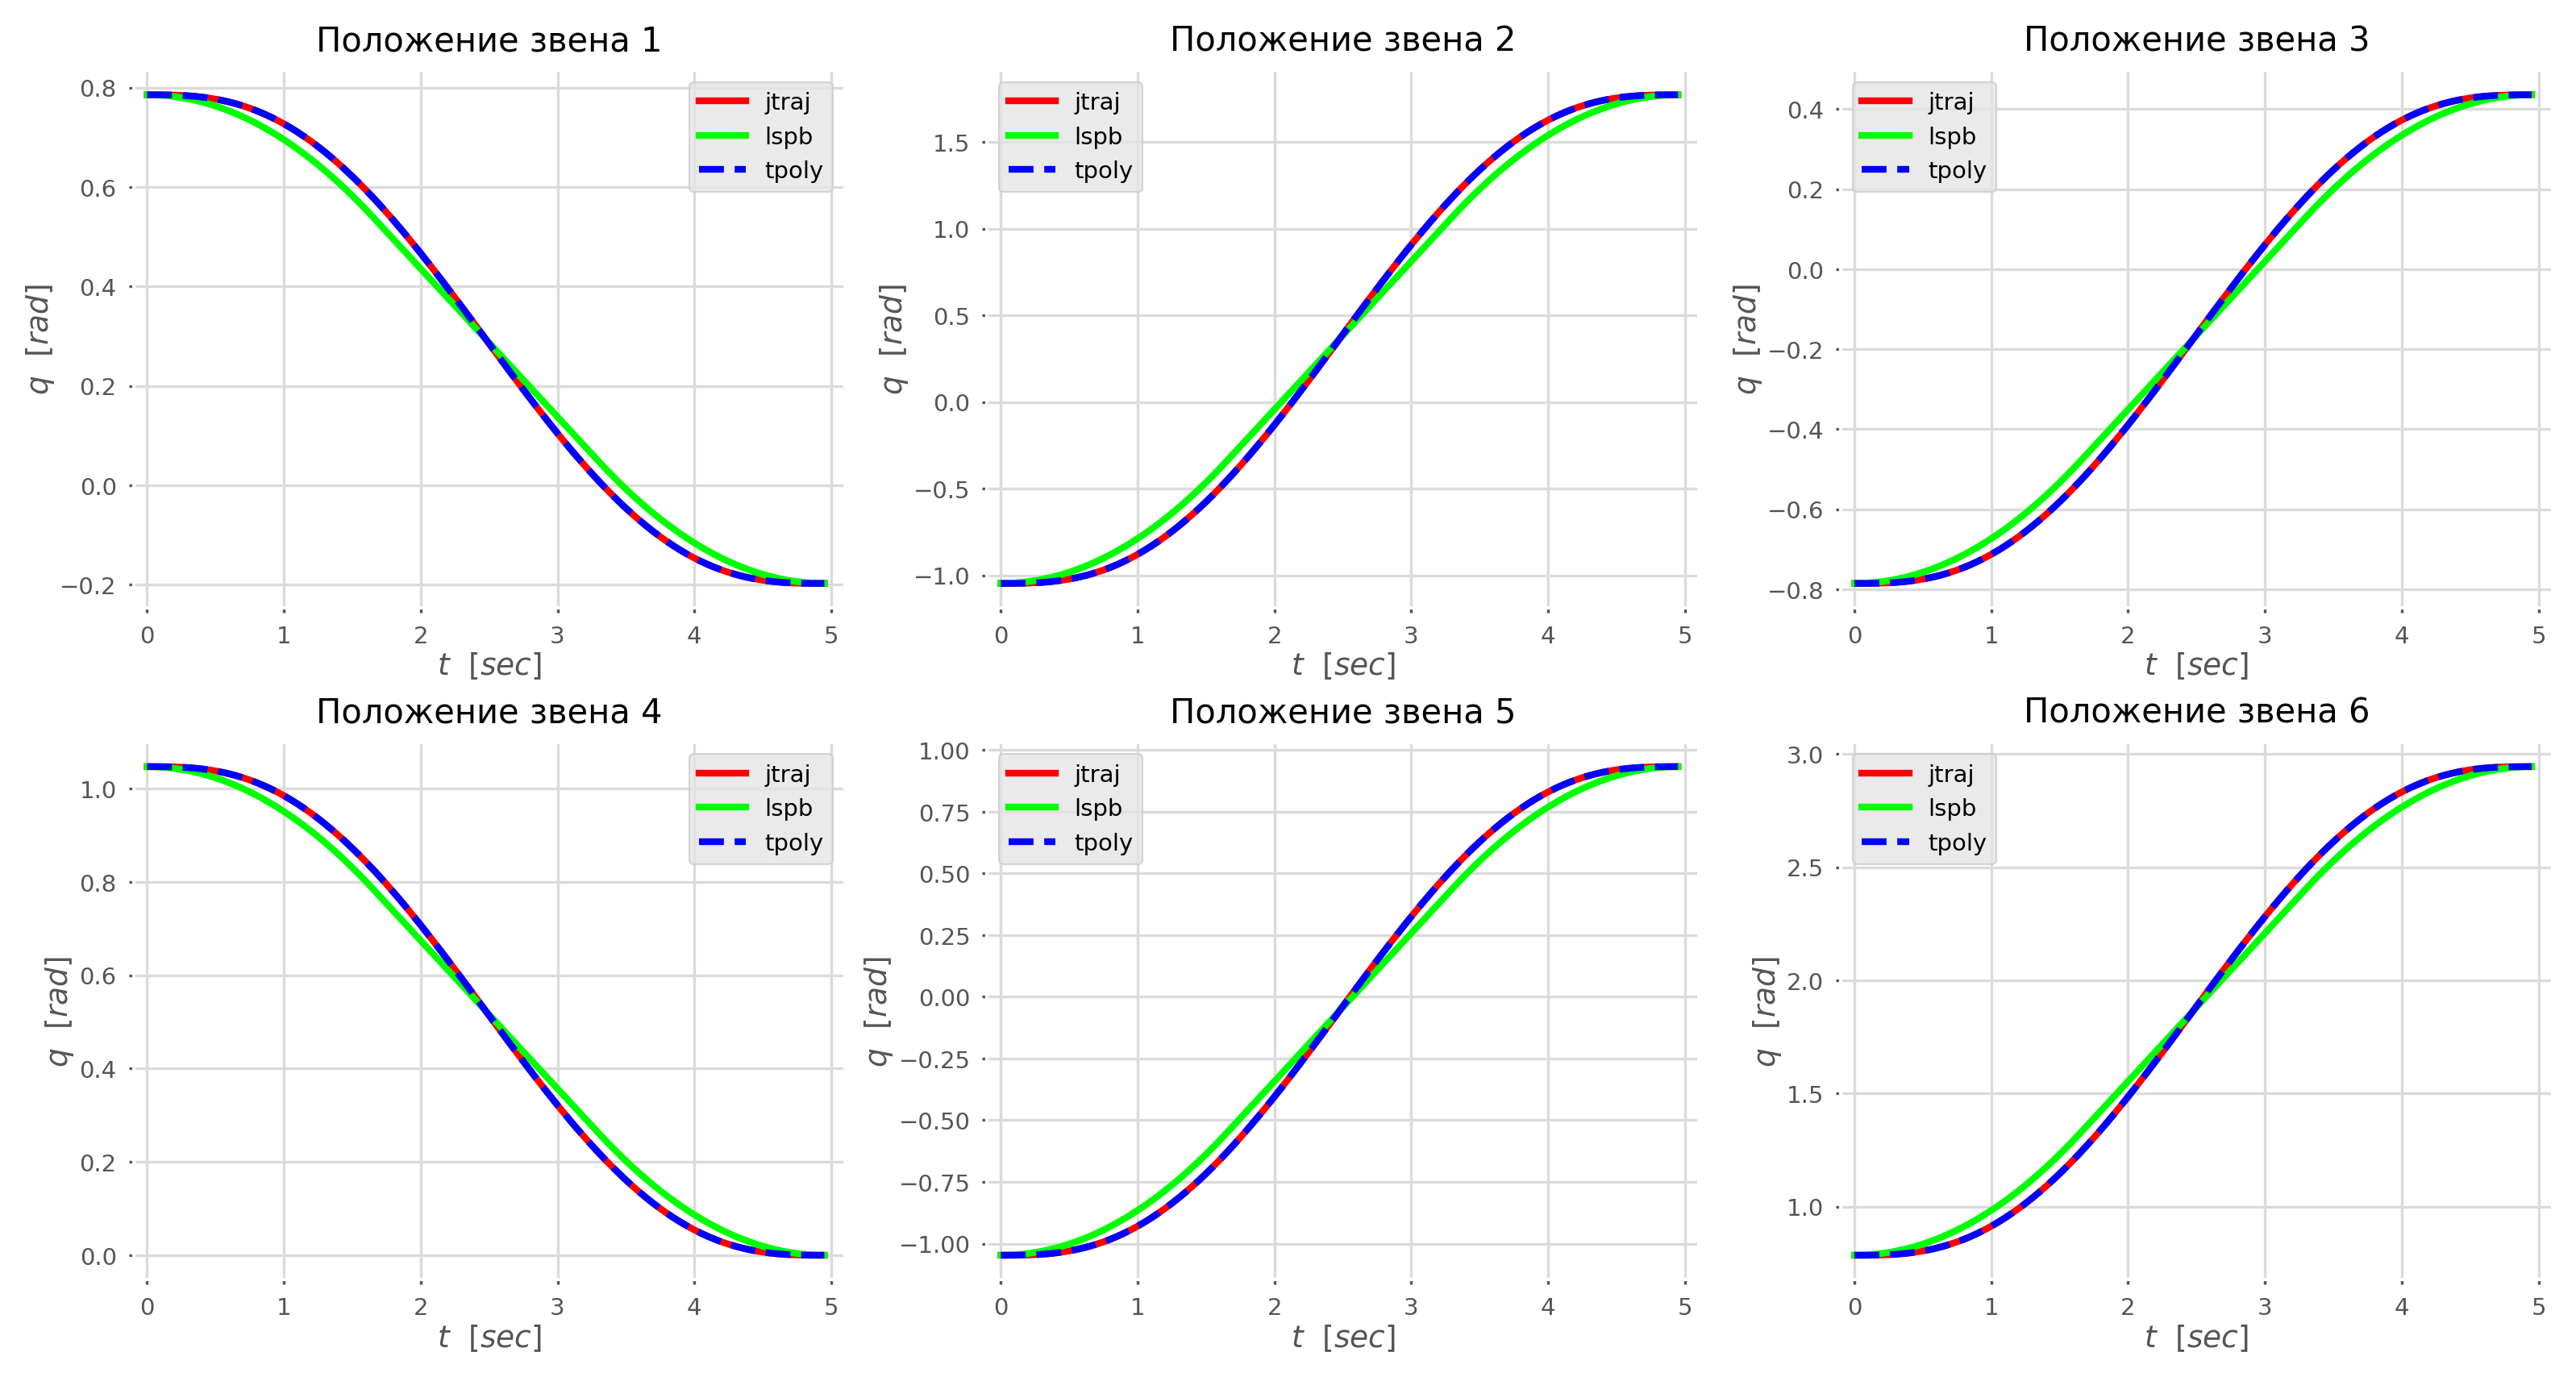

In [60]:
plt.figure(figsize=(10,5), dpi=300)  # Задаем размеры холста и плотность точек (четкость графика)
for g in range(1,7):
    plt.subplot(2,3,g)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0.25)  # Задаем интервалы между графиками, чтоб не перекрывали друг друга
    traektoriya_jtraj = [tr_jtraj.q[i][g-1] for i in range(len(tr_jtraj.q))]  # Извлекаем нужные данные
    traektoriya_trap = [tr_trap.q[i][g-1] for i in range(len(tr_trap.q))]  # Извлекаем нужные данные
    traektoriya_quin = [tr_quin.q[i][g-1] for i in range(len(tr_quin.q))]  # Извлекаем нужные данные
    plt.plot(time, traektoriya_jtraj, linestyle='-', linewidth=2, color=(1,0,0), label=r"jtraj")  # Рисуем линию
    plt.plot(time, traektoriya_trap, linestyle='-', linewidth=2, color=(0,1,0), label=r"lspb")  # Рисуем линию
    plt.plot(time, traektoriya_quin, linestyle='--', linewidth=2, color=(0,0,1), label=r"tpoly")  # Рисуем линию
    plt.title(r"Положение звена {}".format(g), fontsize=10)  # Название графика
    plt.ylabel(r"$q$  [$rad$]", fontsize=9)  # Подпись оси Y
    plt.xlabel(r"$t$  [$sec$]", fontsize=9)  # Подпись оси X
    plt.grid(True)  # Добавить сетку
    plt.legend()  # Отобразить легенду (покажет то, что написано в 'label')
    ax = plt.gca()  # gca = get current axis - чтобы редактировать конкретную фигуру
    ax.set_facecolor((1,1,1))  # Цвет фона на графике
    ax.set_xlim([t_start-0.1,t_stop+0.1])  # Пределы по оси X
plt.show()

Построим графики скоростей для каждого звена

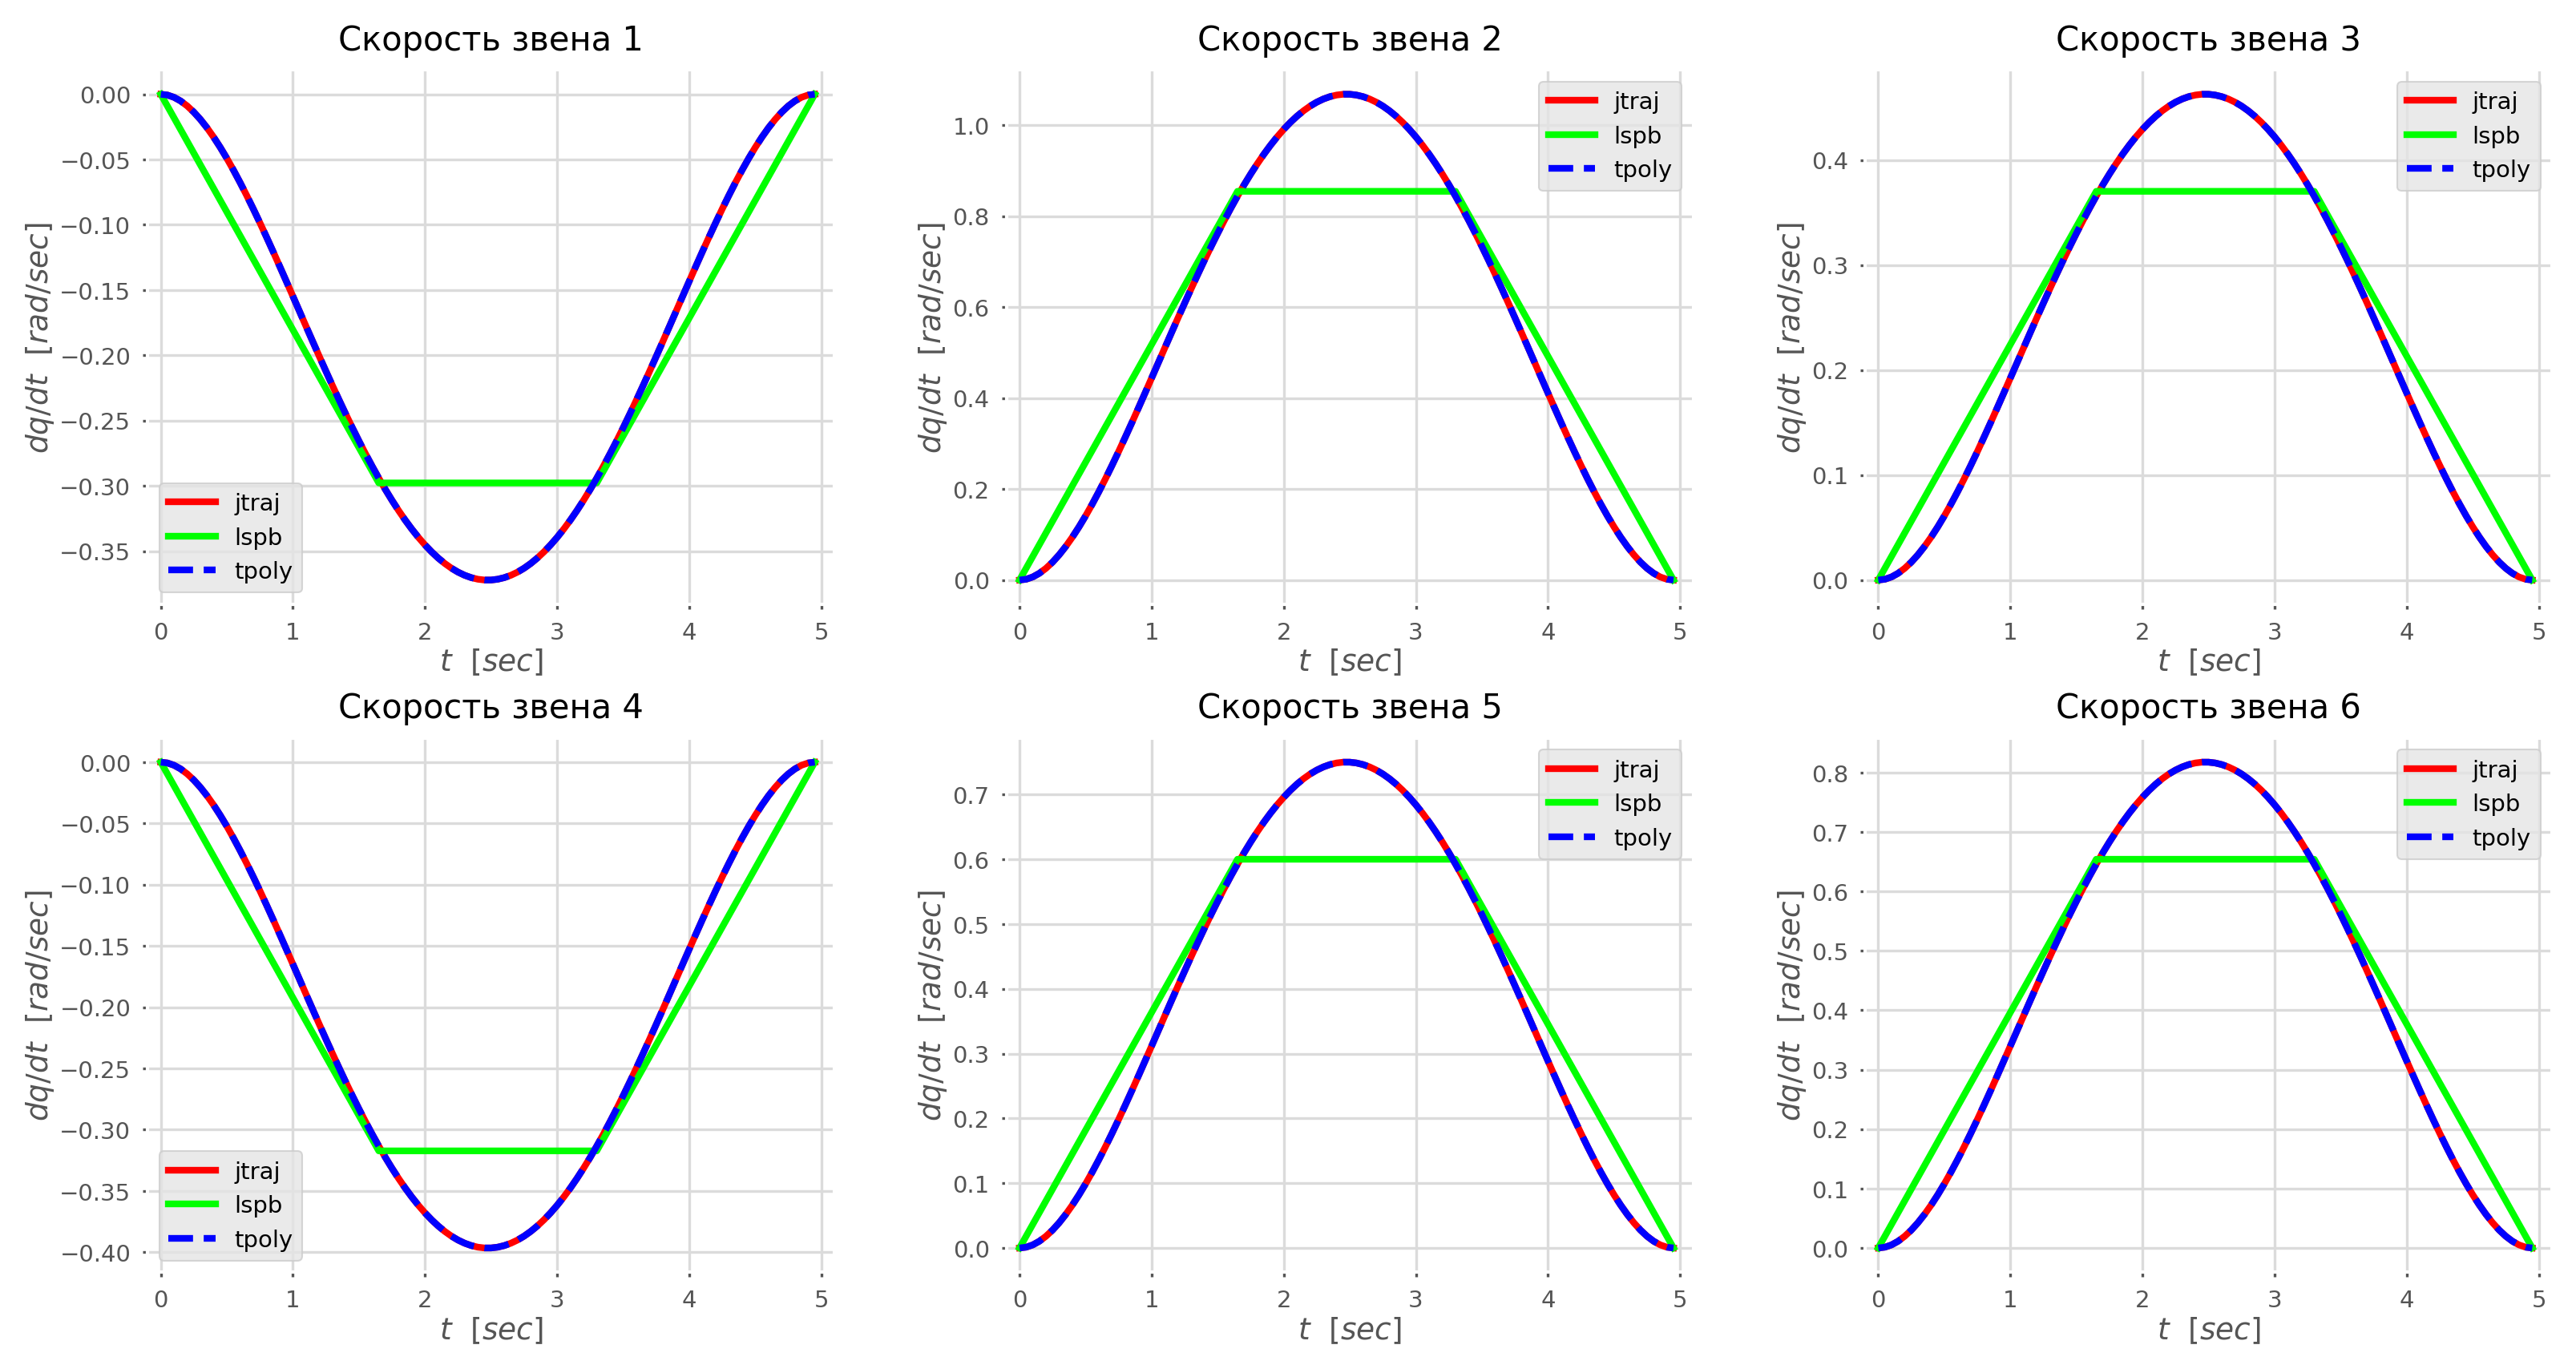

In [61]:
plt.figure(figsize=(10,5), dpi=300)  # Задаем размеры холста и плотность точек (четкость графика)
for g in range(1,7):
    plt.subplot(2,3,g)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.25, hspace=0.25)  # Задаем интервалы между графиками, чтоб не перекрывали друг друга
    traektoriya_jtraj = [tr_jtraj.qd[i][g-1] for i in range(len(tr_jtraj.qd))]  # Извлекаем нужные данные
    traektoriya_trap = [tr_trap.qd[i][g-1] for i in range(len(tr_trap.qd))]  # Извлекаем нужные данные
    traektoriya_quin = [tr_quin.qd[i][g-1] for i in range(len(tr_quin.qd))]  # Извлекаем нужные данные
    plt.plot(time, traektoriya_jtraj, linestyle='-', linewidth=2, color=(1,0,0), label=r"jtraj")  # Рисуем линию
    plt.plot(time, traektoriya_trap, linestyle='-', linewidth=2, color=(0,1,0), label=r"lspb")  # Рисуем линию
    plt.plot(time, traektoriya_quin, linestyle='--', linewidth=2, color=(0,0,1), label=r"tpoly")  # Рисуем линию
    plt.title(r"Скорость звена {}".format(g), fontsize=10)  # Название графика
    plt.ylabel(r"$dq/dt$  [$rad/sec$]", fontsize=9)  # Подпись оси Y
    plt.xlabel(r"$t$  [$sec$]", fontsize=9)  # Подпись оси X
    plt.grid(True)  # Добавить сетку
    plt.legend()  # Отобразить легенду (покажет то, что написано в 'label')
    ax = plt.gca()  # gca = get current axis - чтобы редактировать конкретную фигуру
    ax.set_facecolor((1,1,1))  # Цвет фона на графике
    ax.set_xlim([t_start-0.1,t_stop+0.1])  # Пределы по оси X
plt.show()

Построим графики ускорений для каждого звена

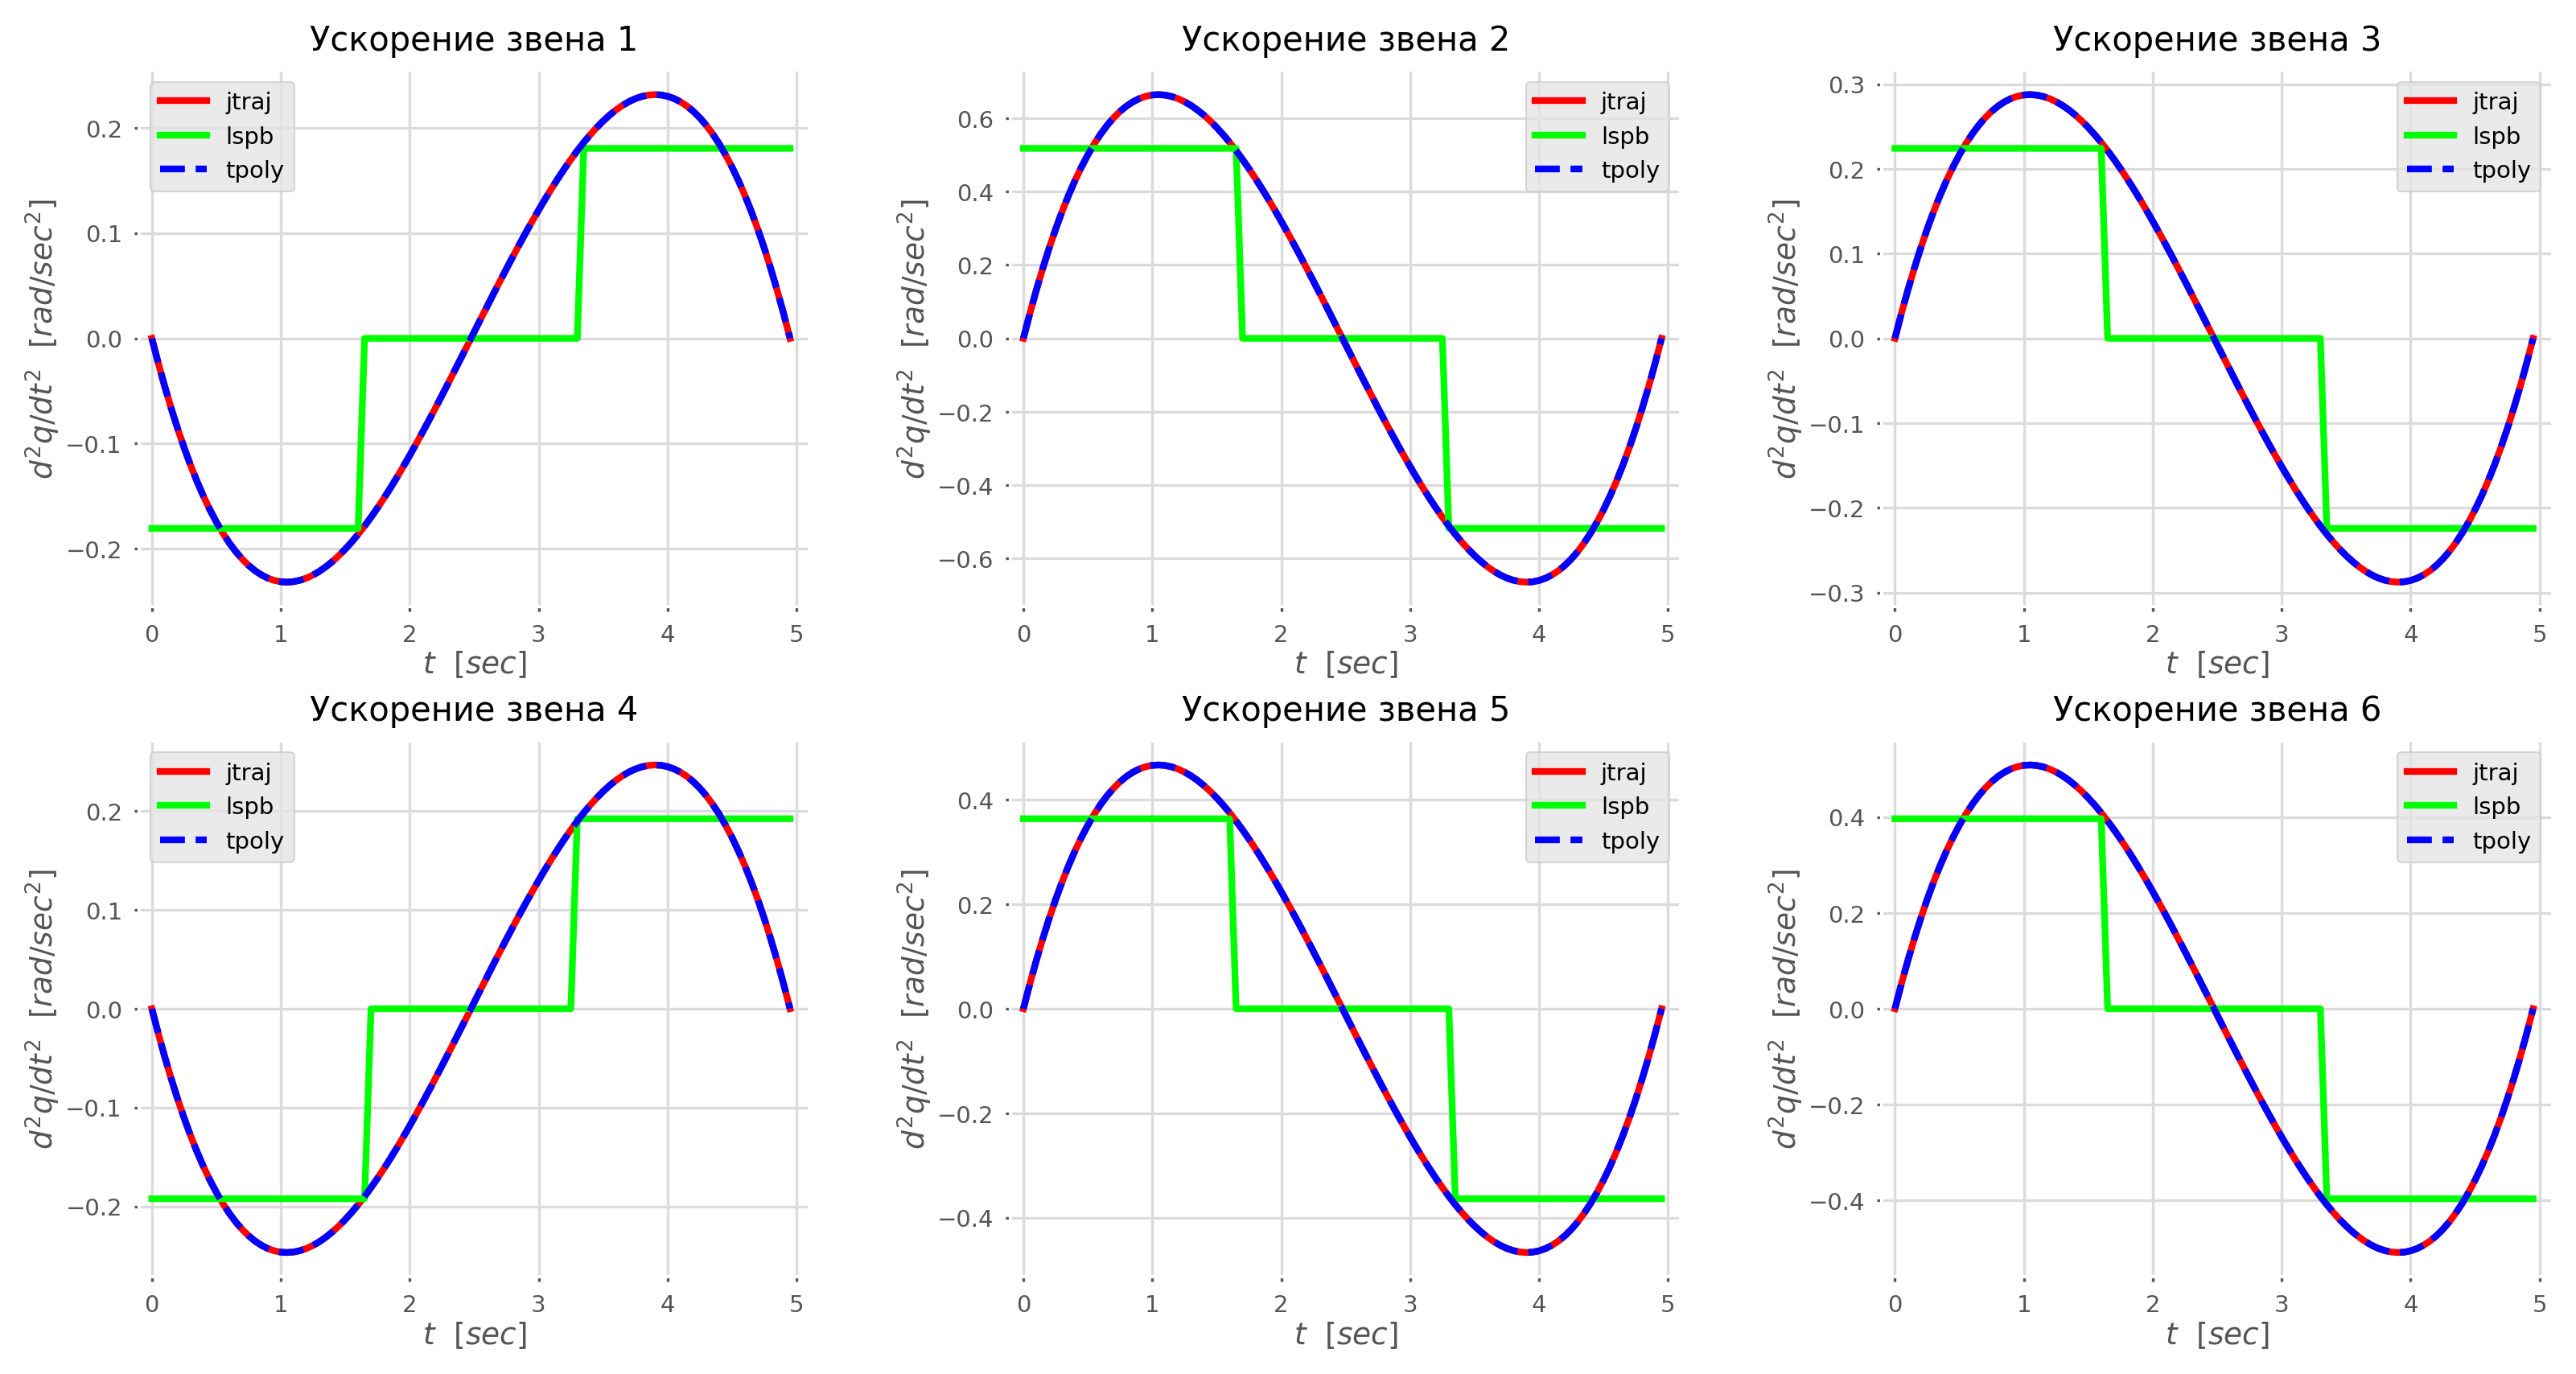

In [62]:
fig = plt.figure(figsize=(10,5), dpi=300)  # Задаем размеры холста и плотность точек (четкость графика)
for g in range(1,7):
    plt.subplot(2,3,g)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.3, hspace=0.25)  # Задаем интервалы между графиками, чтоб не перекрывали друг друга
    traektoriya_jtraj = [tr_jtraj.qdd[i][g-1] for i in range(len(tr_jtraj.qdd))]  # Извлекаем нужные данные
    traektoriya_trap = [tr_trap.qdd[i][g-1] for i in range(len(tr_trap.qdd))]  # Извлекаем нужные данные
    traektoriya_quin = [tr_quin.qdd[i][g-1] for i in range(len(tr_quin.qdd))]  # Извлекаем нужные данные
    plt.plot(time, traektoriya_jtraj, linestyle='-', linewidth=2, color=(1,0,0), label=r"jtraj")  # Рисуем линию
    plt.plot(time, traektoriya_trap, linestyle='-', linewidth=2, color=(0,1,0), label=r"lspb")  # Рисуем линию
    plt.plot(time, traektoriya_quin, linestyle='--', linewidth=2, color=(0,0,1), label=r"tpoly")  # Рисуем линию
    plt.title(r"Ускорение звена {}".format(g), fontsize=10)  # Название графика
    plt.ylabel(r"${d^2}q/d{t^2}$  [$rad/{sec}^2$]", fontsize=9)  # Подпись оси Y
    plt.xlabel(r"$t$  [$sec$]", fontsize=9)  # Подпись оси X
    plt.grid(True)  # Добавить сетку
    plt.legend()  # Отобразить легенду (покажет то, что написано в 'label')
    ax = plt.gca()  # gca = get current axis - чтобы редактировать конкретную фигуру
    ax.set_facecolor((1,1,1))  # Цвет фона на графике
    ax.set_xlim([t_start-0.1,t_stop+0.1])  # Пределы по оси X
plt.show()